### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [4]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [5]:
loja.describe()

,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,650.491361,34.691805,3.976685,2.943196,-20.763366,-47.349385
std,819.582778,43.814183,1.415370,2.819897,5.372400,4.183180
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,74.345000,4.141783,3.000000,1.000000,-22.250000,-48.790000
50%,313.750000,16.498835,5.000000,1.000000,-22.190000,-48.790000
75%,904.130000,48.050074,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,214.377060,5.000000,24.000000,1.410000,-36.590000


#1. Análise do faturamento



Próximo Passo: Unificação das Lojas
Como o DataFrame loja está limpo e estruturado, podemos assumir que as outras três lojas (loja2, loja3, loja4) seguirão um padrão similar.

Vamos concluir a etapa de unificação para que possamos começar a calcular as métricas (faturamento, média, etc.) das quatro lojas juntas.

In [6]:
# 1. Adicionar a coluna de identificação 'Loja' em cada DataFrame
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# 2. Unificar os quatro DataFrames em um único
# O pd.concat empilha as tabelas. O ignore_index=True reseta os índices.
df_consolidado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# 3. Verificar o resultado final (deve ter 4x o número de linhas originais)
print(f"Total de linhas no DataFrame consolidado: {len(df_consolidado)}")
df_consolidado.head()

Total de linhas no DataFrame consolidado: 9435


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [11]:
print(len(df_consolidado))

9435


In [13]:
# 1. Agrupar por Loja e Categoria do Produto
# O .size() conta o número de registros (vendas) em cada grupo.
vendas_por_categoria = df_consolidado.groupby(['Loja', 'Categoria do Produto']).size()

# 2. Transformar o resultado em DataFrame para melhor visualização e ordenação
vendas_por_categoria = vendas_por_categoria.reset_index(name='Total de Vendas')

# 3. Ordenar para ver as categorias mais populares de cada loja no topo
# Ordenamos por 'Loja' e, dentro de cada loja, por 'Total de Vendas' em ordem decrescente.
vendas_por_categoria_ordenado = vendas_por_categoria.sort_values(
    by=['Loja', 'Total de Vendas'],
    ascending=[True, False]
)

# 4. Exibir todas as categorias de todas as lojas
vendas_por_categoria_ordenado

,Loja,Categoria do Produto,Total de Vendas
6,Loja 1,moveis,465
2,Loja 1,eletronicos,448
0,Loja 1,brinquedos,324
1,Loja 1,eletrodomesticos,312
3,Loja 1,esporte e lazer,284
4,Loja 1,instrumentos musicais,182
5,Loja 1,livros,173
7,Loja 1,utilidades domesticas,171
14,Loja 2,moveis,442
10,Loja 2,eletronicos,422


In [14]:
# 1. Agrupar pela coluna 'Loja' e calcular a soma da coluna 'Preço'
# O .sum() calcula a soma para cada grupo ('Loja')
faturamento_total = df_consolidado.groupby('Loja')['Preço'].sum()

# 2. Exibir o resultado, ordenando do maior para o menor faturamento
print("--- Faturamento Total (Soma de Preços) por Loja ---")
print(faturamento_total.sort_values(ascending=False))


--- Faturamento Total (Soma de Preços) por Loja ---
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


# 2. Vendas por Categoria

In [16]:

# 1. Agrupar pela coluna 'Loja' e calcular a soma da coluna 'Preço'
# O .sum() calcula a soma para cada grupo ('Loja')
faturamento_total = df_consolidado.groupby('Loja')['Preço'].sum()

# 2. Exibir o resultado, ordenando do maior para o menor faturamento
print("--- Faturamento Total (Soma de Preços) por Loja ---")
print(faturamento_total.sort_values(ascending=False))


--- Faturamento Total (Soma de Preços) por Loja ---
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


# 3. Média de Avaliação das Lojas


In [15]:
# 1. Agrupar por Loja e calcular a média da coluna 'Avaliação da compra'
media_avaliacao = df_consolidado.groupby('Loja')['Avaliação da compra'].mean()

# 2. Exibir o resultado, ordenando do maior para o menor (melhor avaliação no topo)
print("--- Média de Avaliação por Loja (Escala de 1 a 5) ---")
print(media_avaliacao.sort_values(ascending=False))

--- Média de Avaliação por Loja (Escala de 1 a 5) ---
Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [18]:
# 1. Agrupar por Loja e Produto e contar o número de vendas (size)
vendas_por_produto = df_consolidado.groupby(['Loja', 'Produto']).size()

# 2. Transformar o resultado em DataFrame para ordenação
vendas_por_produto = vendas_por_produto.reset_index(name='Total de Vendas')

# 3. Ordenar o resultado para visualizar o topo e a base
# Ordena por Loja e, dentro de cada loja, por Total de Vendas.
vendas_por_produto_ordenado = vendas_por_produto.sort_values(
    by=['Loja', 'Total de Vendas'],
    ascending=[True, False] # Ordena a loja crescentemente e as vendas decrescentemente
)

# 4. Exibir o topo (mais vendidos) e a base (menos vendidos) de cada loja
print("--- 5 PRODUTOS MAIS VENDIDOS POR LOJA ---")
print(vendas_por_produto_ordenado.head(20)) # 4 lojas * 5 mais vendidos = 20 linhas

print("\n--- 5 PRODUTOS MENOS VENDIDOS POR LOJA ---")
print(vendas_por_produto_ordenado.tail(20)) # As últimas 20 linhas serão os menos vendidos

--- 5 PRODUTOS MAIS VENDIDOS POR LOJA ---
      Loja                   Produto  Total de Vendas
24  Loja 1             Guarda roupas               60
37  Loja 1               Micro-ondas               60
47  Loja 1             TV Led UHD 4K               60
43  Loja 1        Secadora de roupas               58
3   Loja 1          Blocos de montar               56
17  Loja 1                    Cômoda               56
4   Loja 1          Bola de basquete               55
2   Loja 1                 Bicicleta               54
14  Loja 1              Copo térmico               54
23  Loja 1                 Geladeira               54
27  Loja 1                Impressora               54
1   Loja 1                   Bateria               53
10  Loja 1  Carrinho controle remoto               52
20  Loja 1                  Faqueiro               52
39  Loja 1       Modelagem preditiva               51
22  Loja 1            Fone de ouvido               50
12  Loja 1          Celular Plus X42    

# 5. Frete Médio por Loja

In [19]:
# 1. Agrupar por Loja e calcular a média da coluna 'Frete'
custo_medio_frete = df_consolidado.groupby('Loja')['Frete'].mean()

# 2. Exibir o resultado, ordenando do mais caro para o mais barato
print("--- Custo Médio do Frete por Loja (R$) ---")
print(custo_medio_frete.sort_values(ascending=False))

--- Custo Médio do Frete por Loja (R$) ---
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import pandas as pd


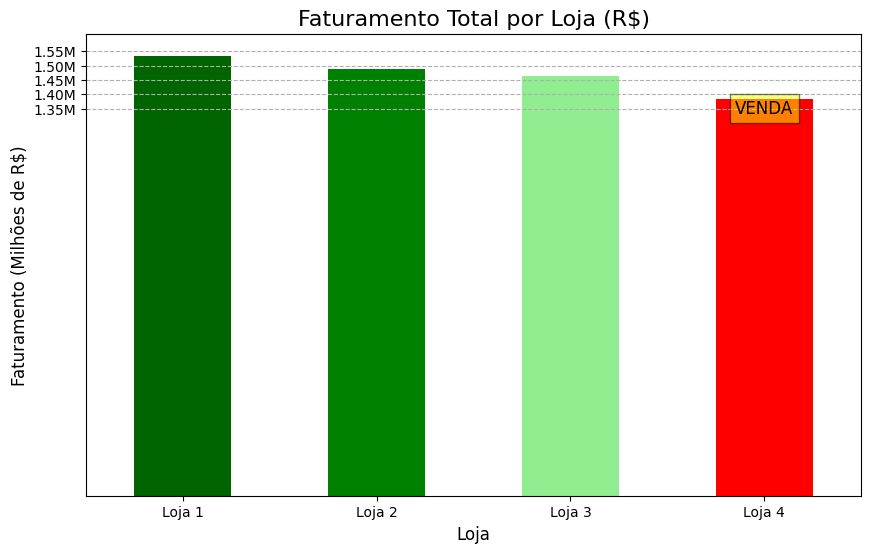

In [23]:
# Recriando o Faturamento Total para uso (garantindo que você tenha o DataFrame correto)
faturamento_total = df_consolidado.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(10, 6))
faturamento_total.plot(kind='bar', color=['darkgreen', 'green', 'lightgreen', 'red'])

# Adicionando rótulos e título
plt.title('Faturamento Total por Loja (R$)', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (Milhões de R$)', fontsize=12)
plt.yticks([1350000, 1400000, 1450000, 1500000, 1550000],
           ['1.35M', '1.40M', '1.45M', '1.50M', '1.55M']) # Formatação para melhor leitura

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=0)

# Adicionar um destaque (texto) para a Loja 4
plt.text(faturamento_total.index.get_loc('Loja 4'), faturamento_total['Loja 4'] - 50000,
         'VENDA', horizontalalignment='center', color='black', fontsize=12,
         bbox=dict(facecolor='yellow', alpha=0.5))

plt.grid(axis='y', linestyle='--')
plt.show()

/tmp/ipython-input-1514299055.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(loja, (desempenho['Custo_Medio_Frete'][i] + 0.1, desempenho['Media_Avaliacao'][i]), fontsize=12)


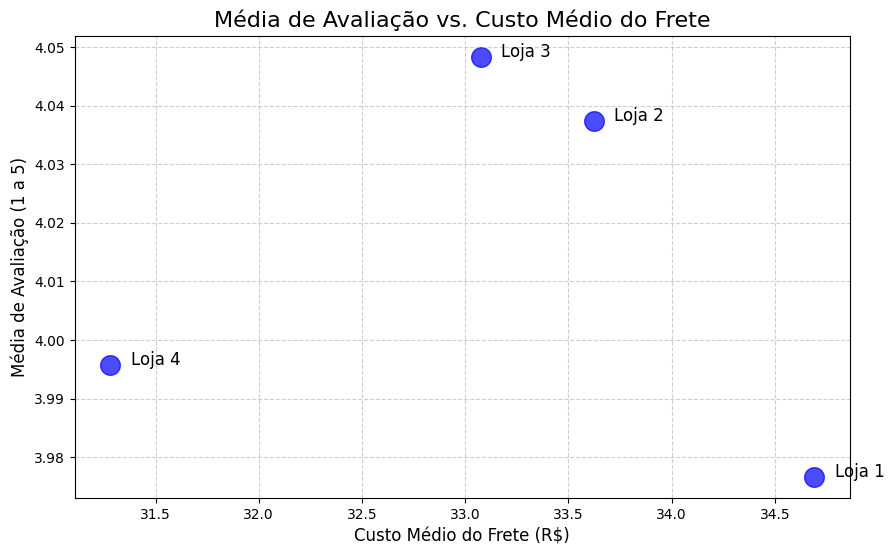

In [24]:
# Calcular as duas métricas e juntar em um novo DataFrame
desempenho = df_consolidado.groupby('Loja').agg(
    Media_Avaliacao=('Avaliação da compra', 'mean'),
    Custo_Medio_Frete=('Frete', 'mean')
).sort_values(by='Custo_Medio_Frete', ascending=False)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(desempenho['Custo_Medio_Frete'], desempenho['Media_Avaliacao'], s=200, color='blue', alpha=0.7)

# Adicionando rótulos dos pontos (Loja 1, Loja 2, etc.)
for i, loja in enumerate(desempenho.index):
    plt.annotate(loja, (desempenho['Custo_Medio_Frete'][i] + 0.1, desempenho['Media_Avaliacao'][i]), fontsize=12)

# Adicionando rótulos e título
plt.title('Média de Avaliação vs. Custo Médio do Frete', fontsize=16)
plt.xlabel('Custo Médio do Frete (R$)', fontsize=12)
plt.ylabel('Média de Avaliação (1 a 5)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<Figure size 1200x700 with 0 Axes>

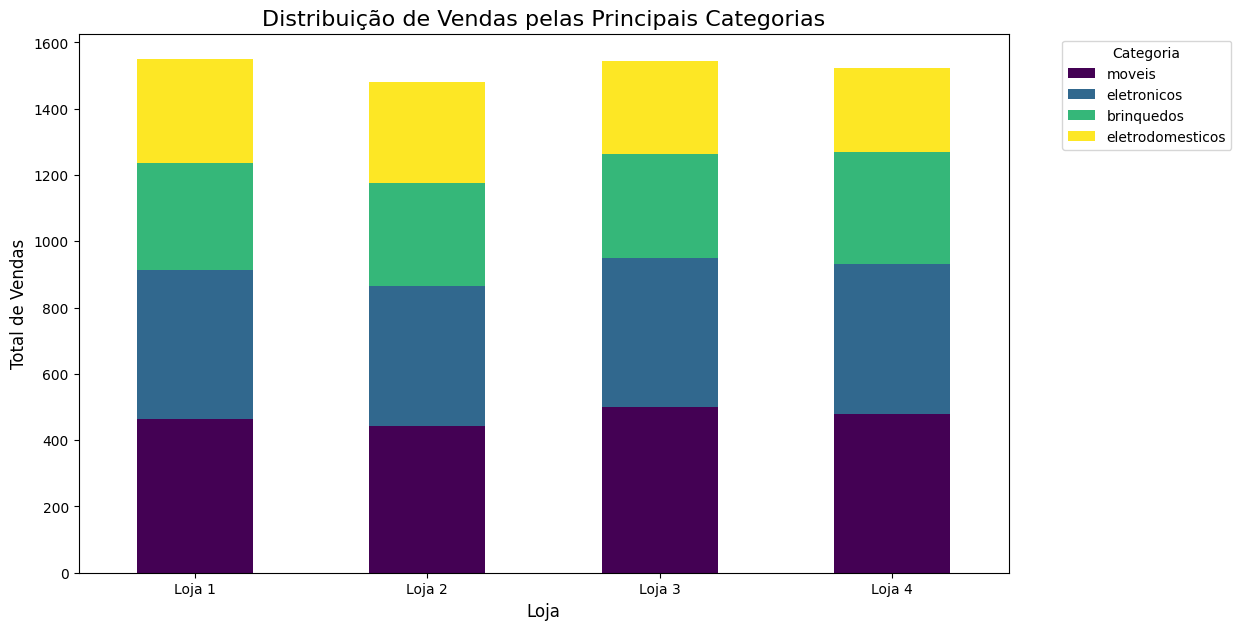

In [25]:
# Recriar e focar nas 3 principais categorias (Móveis, Eletrônicos, Brinquedos)
vendas_categoria_por_loja = df_consolidado.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

# Selecionar as categorias mais relevantes para a visualização
categorias_foco = ['moveis', 'eletronicos', 'brinquedos', 'eletrodomesticos']
df_categorias = vendas_categoria_por_loja[categorias_foco]

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12, 7))
df_categorias.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# Adicionando rótulos e título
plt.title('Distribuição de Vendas pelas Principais Categorias', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Relatório Final: Análise de Desempenho**

---


O objetivo desta análise foi avaliar o desempenho financeiro, logístico e a satisfação do cliente das quatro lojas da Alura Store (**Loja 1 a Loja 4**). O estudo visa fornecer ao Sr. João uma recomendação clara sobre qual unidade possui o menor desempenho geral e deve ser vendida para viabilizar o investimento em um novo negócio.

A decisão foi baseada na comparação de cinco métricas principais: Faturamento Total, Média de Avaliação dos Clientes, Volume de Vendas por Produto e Custo Médio do Frete.

Desenvolvimento e Análise de Dados
1. Faturamento Total (**Gráfico de Barras**)
O faturamento é o indicador financeiro primário. A análise da coluna Preço (soma total) revelou uma clara diferença entre as lojas:

Loja 1: R$ 1.534.509,12 (MAIOR Faturamento)

Loja 4: R$ 1.384.497,58 (MENOR Faturamento)

Insight: Sob o critério de receita pura, a Loja 4 é a mais fraca e a principal candidata à venda.

2. Satisfação do Cliente e Custo Logístico
Analisamos a Média de Avaliação e o Custo Médio do Frete para entender a lucratividade e o risco futuro de cada unidade (Gráfico de Dispersão):

Média de Avaliação: A Loja 1 possui a PIOR média de avaliação (3.976), sugerindo que seu alto faturamento vem à custa da satisfação do cliente. A Loja 3 tem a MELHOR média (4.048).


Frete Médio: A Loja 1 possui o frete médio mais caro (**R$ 34,69**),

o que pode explicar em parte a baixa satisfação e o alto custo logístico. A Loja 4 possui o frete mais barato(**R$ 31,27**).

3. Categorias e Produtos (Gráficos de Barras Empilhadas)
A análise do mix de produtos (Móveis, Eletrônicos, etc.) mostrou uma alta dependência das categorias 'móveis' e 'eletrônicos' em todas as lojas.

Ao analisar o volume de vendas de produtos específicos, observamos o problema estrutural da Loja 4:

Loja 1 (**Forte**): Vendas altas e diversificadas no topo (Guarda-roupas, Micro-ondas com 60 vendas).

Loja 4 (**Fraca**): Produtos de alto valor e demanda, como Geladeira (38 vendas) e Guarda-roupas (37 vendas), aparecem entre os menos vendidos. Isso confirma um grave problema de baixo giro de estoque e competitividade.

Conclusão e Recomendação
Com base na síntese dos dados, a recomendação é clara:

🔴 **A Loja que o Senhor João deve vender é a LOJA 4.**


Justificativa da Decisão:
Desempenho Financeiro Incontestável: A Loja 4 é o lanterna vermelha no indicador mais crítico, o Faturamento Total, com uma diferença de mais de R$ 150.000,00 para a Loja 1.

Problemas Estruturais de Venda: A Loja 4 demonstra incapacidade de mover produtos essenciais de alta demanda (Móveis e Eletrodomésticos) em bom volume, o que compromete sua lucratividade futura, apesar do frete baixo.

Potencial vs. Risco: Embora a Loja 1 tenha a pior avaliação e o frete mais caro, seu faturamento robusto indica que ela tem o maior potencial de retorno se houver investimento em logística e satisfação. Já a Loja 4 falha no básico (vender).

Vender a Loja 4 permite ao Sr. João eliminar a unidade de menor retorno financeiro e focar os recursos remanescentes na melhoria da qualidade do serviço na Loja 1.